# Avocado price forecasting

The dataset, which contains retail scan data for avocado sellings, was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The data can easily be retrieved over the [kaggle challenge page](https://www.kaggle.com/neuromusic/avocado-prices). Let's start by loading our dataset, so we can start exploring the data inside!

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('./data/avocado.csv')

Let's check the size of our dataset first:

In [45]:
print('Training set shape: ', df.shape)

Training set shape:  (18249, 14)


Let's by taking a peek at our dataset trough the head function to see what kind of variables are present.

In [46]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Let's drop the useless index column:

In [47]:
df = df.drop(['Unnamed: 0'], axis=1)

It's  quick to check that we have no missing entries in our dataset. Kaggle likes to make things easier for us, but real dataset aren't that kind.

In [48]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In our data, we have two categorical features, namely type and region. We can quickly check how many entries each category has and which are the category:

In [49]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

We notice that almost 50% of our avocados are conventional and the remaining are organic, which makes for a pretty balanced feature. Let's check the regions:

In [50]:
df['region'].value_counts()

Southeast              338
Nashville              338
PhoenixTucson          338
SouthCarolina          338
LosAngeles             338
TotalUS                338
BuffaloRochester       338
Columbus               338
RichmondNorfolk        338
RaleighGreensboro      338
Atlanta                338
Tampa                  338
SanFrancisco           338
LasVegas               338
Indianapolis           338
Spokane                338
GrandRapids            338
GreatLakes             338
SanDiego               338
Louisville             338
Houston                338
Plains                 338
Denver                 338
SouthCentral           338
California             338
NorthernNewEngland     338
Boston                 338
Midsouth               338
Chicago                338
Syracuse               338
Roanoke                338
Northeast              338
Albany                 338
DallasFtWorth          338
Detroit                338
StLouis                338
Philadelphia           338
J

In [51]:
print('The total number of region is ' + str(df['region'].value_counts().count()))

The total number of region is 54


We have a grandtotal of 54 different american cities, each with almost 338 entries. 

For the numerical features, we can quickly take a look at the statistical informations trough the describe function.

In [52]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Let's create a temporary dataset we'll use to experiment. 

In [53]:
avocado_df = df.copy()

We can split the date so we can perform further analysis later; We can do this easily using pandas:

In [54]:
# Transoform the column into datetime format
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])

# Split the date
avocado_df['Day']=avocado_df['Date'].dt.day
avocado_df['Month']=avocado_df['Date'].dt.month
avocado_df['Year']=avocado_df['Date'].dt.year

In [55]:
avocado_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month,Year
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12,2015
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12,2015
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12,2015
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12,2015
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11,2015


## data viz

It's time to start visually analize our data and start gaining insights. It's important to keep in mind that we are dealing with time-series data. 

Let's start by checking the average price of avocados during time: 

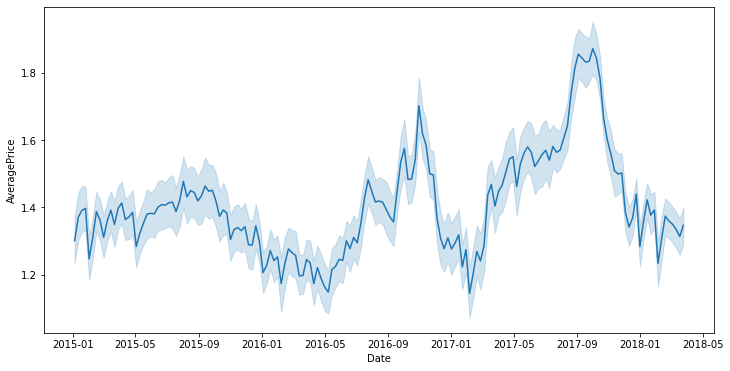

In [58]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x="Date", y="AveragePrice", data=avocado_df)

Here we can quickly see that our data span between the early 2015 to May 2018.
 
In particular, we can see some seasonality on the fluctuation of the price: during the coldest months, the price seems to go down by a small margin. Trough a quick research on Google, we discover that the avocado season usually start in spring and see its end towards the fall. Thus, we see a lower demands for Avocado (perhaps due to the off-seasonality of the product offered during the coldest month?). This will need further investigation going forward.

Another particularly interesting phenomenon is the great spike on the price during 2016 and the following year. We may be tempted to say that the Avocado became 'mainstream' jsut recently, but by checking Google Trends we don't see any particular spikes in the searches (which usually correlate to popularity). The cause of the increase was due to a shortage of supplies. The price however didn't decrease the following year, and just during early 2018 started to decrease back due to higher availability. Shippings from Mexico (the larger furnisher of Avocado for USA) may also affects the price. 

We can make hypothesis on the stationarity of the prices over time. In stationary (time) series, statistical properties like mean, variance and autocorrelation mantains constant over time. Since most statistical models for time series assume the stationarity of the data, this is an important matter. If our data is not stationary, we should convert it to stationary. 

There are many different ways to assume stationarity on our data, for example we could:
1. By graphically looking at our data;
2. Dickey-Fuller Test;
3. Statistical property over different parts of our data.

The idea behind a Dickey-Fuller test is to test the null hypothesis that a unit root is present in time series data, which refers to a stochastic trend. To perform a Dickey-Fuller test, we can use the [adfuller function](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html) from the statsmodel library, which perform an Augmented Dickey-Fuller on our data. Let's do this for the price of the avocado.

In [63]:
## Perform an ADF test on our time series data
from statsmodels.tsa.stattools import adfuller

X = avocado_df['AveragePrice'].values
results = adfuller(X)
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.449624
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


We've obtained a p-value of <0.001, which implies high significance. Therefore, we can reject the null hypothesis. Therefore, our data will (likely) be stationary. 